# Convolutional Neural Networks (CNN) - Object Recognition 

In [ ]:
from numpy.random import seed
seed(888)

#from tensorflow import set_random_seed
#set_random_seed(4112)
import tensorflow
tensorflow.random.set_seed(112)

In [ ]:
import os
import numpy as np
import itertools

import tensorflow as tf
import keras
from keras.datasets import cifar10 # importing the dataset

from keras.models import Sequential       #to define model/ layers
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten   

from sklearn.metrics import confusion_matrix

# To Explore the images
from IPython.display import display
from keras.preprocessing.image import array_to_img

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Dropout

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd

## Get the Dataset CIFAR-10 

In [ ]:
# Getting the dataset as a Tuple

(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


## Constants

In [ ]:
LABEL_NAMES = ['airplane', 'automobile','bird','cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Exploring the Data

In [ ]:
x_train_all.shape

(50000, 32, 32, 3)

In [ ]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
x_train_all[0].shape

(32, 32, 3)

### Using ipython to display the image

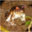

In [ ]:
# To use the ipython display to view an image

pic = array_to_img(x_train_all[0])
display(pic)

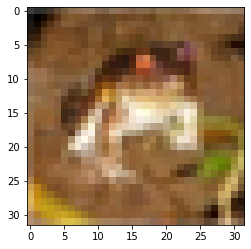

In [ ]:
plt.imshow(x_train_all[0])

In [ ]:
# To check the label 
y_train_all.shape

(50000, 1)

In [ ]:
# Note that in the image above the index 1 corresponds to "Automobile" 
# we have a 2 dimension numpy array; that is why we also include " [0] "

y_train_all[0][0]

6

In [ ]:
# Using the lable names to get the actual names of classes

LABEL_NAMES[y_train_all[0][0]]

'frog'

### The shape of the image

    * 32, 32 is the weight and the height
    * 3 is the number of channels (These are the number of colors): Red, Green & Blue (RGB)
    
 * x_train_all.shape  >>> (50000, 32, 32, 3)
     * this means we have 50,000 entries | then 32x32  weight and height| 3 colors (RGB)

x_train_all.shape

In [ ]:
number_of_images, x, y, c = x_train_all.shape
print(f'Number of images = {number_of_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

Number of images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [ ]:
x_test.shape

(10000, 32, 32, 3)

### Preprocess Data

#### * We need to preprocess our data so that it is easier to feed it to our neural network.

<b>

* uint8 means an unsigned integer... 8-bit integer with no negative sign (-). It means a positive integer 1984 is an example of uint.

* 255 is the maximum number we have RGB
* If we divide x_train_all by 255.0 we will get a float number between 0 and 1.
* Scaling the x_train_all down to between 0 and 1 helps out learning rate. we know the learning rate is typically small
</b>


### Scalling both x_train and test

In [ ]:
x_train_all =x_train_all / 255.0

In [ ]:
x_test =  x_test / 255.0

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

### Creating categorical encoding for the "y " data

In [ ]:
# 10 >>> simply means we have 10 classes like we already know (creating the encoding for 10 classes)
y_cat_train_all = to_categorical(y_train_all,10)

In [ ]:
# 10 >>> simply means we have 10 classes like we already know (creating the encoding for 10 classes)
y_cat_test = to_categorical(y_test,10)

In [ ]:
y_cat_train_all

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating the Validation dataset

For small data we usually go with:
    * 60% for Training 
    * 20% Validation 
    * 20% Testing
    
    
    Only the final selected model gets to see the testing data. This helps us to ensure that we have close to real data in real-world when the model is deployed. Only our best model gets to see our testing dataset. Because it will give us a realistic impression of how our model will do in the real world
___

However, if the dataset is enormous.:
    * 1% for is used for validation
    * 1% for is used for testing

In [ ]:
VALIDATION_SIZE = 10000

In [ ]:
# VALIDATION_SIZE = 10,000 as defined above 

x_val = x_train_all[:VALIDATION_SIZE]
y_val_cat = y_cat_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 32, 32, 3)

In [ ]:
y_val_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### NEXT:

We Create two NumPy arrays x_train and y_train that have the shape(40000, 3072) and (40000,1) respectively.
They will contain the last 40000 values from x_train_all and y_train_all respectively

In [ ]:
x_train = x_train_all[VALIDATION_SIZE:]
y_cat_train= y_cat_train_all[VALIDATION_SIZE:]

In [ ]:
x_train.shape

(40000, 32, 32, 3)

In [ ]:
y_cat_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### BUILDING THE MODEL

# MODEL ONE Dropout

In [ ]:
model_1 = Sequential()

# CONVOLUTIONAL LAYER
model_1.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',))
model_1.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model_1.add(MaxPool2D(pool_size=(2, 2)))
model_1.add(Dropout(0.2))

# CONVOLUTIONAL LAYER
model_1.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',))
model_1.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model_1.add(MaxPool2D(pool_size=(2, 2)))
model_1.add(Dropout(0.2))

# CONVOLUTIONAL LAYER
model_1.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model_1.add(MaxPool2D(pool_size=(2, 2)))
model_1.add(Dropout(0.2))

# FLATTEN IMAGES FROM 32 x 32 x 3 =3072 BEFORE FINAL LAYER
model_1.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER
model_1.add(Dense(256, activation='relu'))
model_1.add(Dropout(0.2))
# 128 NEURONS IN DENSE HIDDEN LAYER
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model_1.add(Dense(10, activation='softmax'))

model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [ ]:
history1 = model_1.fit(x_train,y_cat_train,epochs=1000,batch_size=150,validation_data=(x_val,y_val_cat))

Epoch 1/1000
267/267 [==============================] - 37s 14ms/step - loss: 2.0975 - accuracy: 0.1943 - val_loss: 1.6258 - val_accuracy: 0.3894
Epoch 2/1000
267/267 [==============================] - 3s 12ms/step - loss: 1.6431 - accuracy: 0.3862 - val_loss: 1.3996 - val_accuracy: 0.4841
Epoch 3/1000
267/267 [==============================] - 3s 12ms/step - loss: 1.4062 - accuracy: 0.4891 - val_loss: 1.2552 - val_accuracy: 0.5506
Epoch 4/1000
267/267 [==============================] - 3s 12ms/step - loss: 1.2944 - accuracy: 0.5365 - val_loss: 1.1603 - val_accuracy: 0.5886
Epoch 5/1000
267/267 [==============================] - 3s 12ms/step - loss: 1.1986 - accuracy: 0.5766 - val_loss: 1.0997 - val_accuracy: 0.6165
Epoch 6/1000
267/267 [==============================] - 3s 12ms/step - loss: 1.1349 - accuracy: 0.5998 - val_loss: 1.0215 - val_accuracy: 0.6392
Epoch 7/1000
267/267 [==============================] - 3s 12ms/step - loss: 1.0475 - accuracy: 0.6353 - val_loss: 0.9754 - val_a

In [ ]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
metrics_1 = pd.DataFrame(history1.history)

In [ ]:
metrics_1

,loss,accuracy,val_loss,val_accuracy
0,1.932399,0.258100,1.625793,0.3894
1,1.577710,0.413675,1.399623,0.4841
2,1.390420,0.493900,1.255176,0.5506
3,1.272179,0.546400,1.160279,0.5886
4,1.182088,0.582650,1.099708,0.6165
...,...,...,...,...
995,0.282488,0.909425,0.844160,0.7783
996,0.276361,0.910875,0.836601,0.7780
997,0.283605,0.908600,0.858610,0.7773
998,0.288250,0.907575,0.833611,0.7767


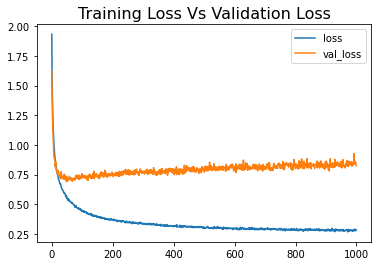

In [ ]:
metrics_1[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

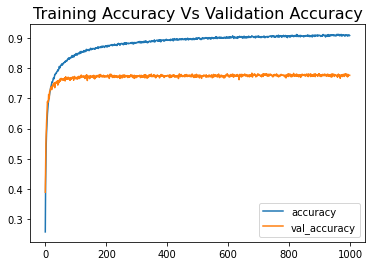

In [ ]:
metrics_1[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

# Evaluation on Test Data

In [ ]:
model_1.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8206 - accuracy: 0.7787


[0.8205503225326538, 0.7786999940872192]

# Classification Report and Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model_1.predict_classes(x_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1000
           1       0.91      0.85      0.88      1000
           2       0.74      0.65      0.69      1000
           3       0.63      0.62      0.63      1000
           4       0.75      0.80      0.77      1000
           5       0.71      0.71      0.71      1000
           6       0.79      0.87      0.83      1000
           7       0.84      0.79      0.81      1000
           8       0.79      0.87      0.83      1000
           9       0.79      0.89      0.84      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



In [ ]:
confusion_matrix(y_test,predictions)

array([[734,  20,  40,  19,  20,   2,  10,  10,  98,  47],
       [ 14, 850,   5,   1,   2,   3,   8,   1,  32,  84],
       [ 49,   4, 650,  58,  66,  60,  65,  21,  16,  11],
       [ 10,   3,  45, 625,  55, 125,  69,  34,  20,  14],
       [  4,   3,  36,  51, 796,  27,  38,  30,   9,   6],
       [  3,   2,  46, 136,  32, 706,  22,  41,   2,  10],
       [  6,   1,  33,  33,  27,  17, 870,   7,   2,   4],
       [ 12,   1,  16,  51,  59,  43,   8, 788,   8,  14],
       [ 33,  16,  10,  11,   2,   1,   5,   3, 874,  45],
       [ 13,  30,   2,   7,   2,   4,   6,   3,  39, 894]])

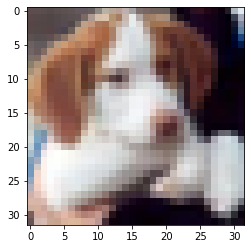

In [ ]:
plt.imshow(x_test[16])

In [ ]:
my_image = x_test[16]

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)
model_1.predict_classes(my_image.reshape(1,32,32,3))

In [ ]:
LABEL_NAMES[y_test[16][0]]

'dog'

## Confusion Matrix

In [ ]:
predictions = model_1.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [ ]:
conf_matrix.shape

(10, 10)

In [ ]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [ ]:
# Showing the value with th
conf_matrix.max()

894

In [ ]:
conf_matrix.min()

1

In [ ]:
NR_CLASSES = 10

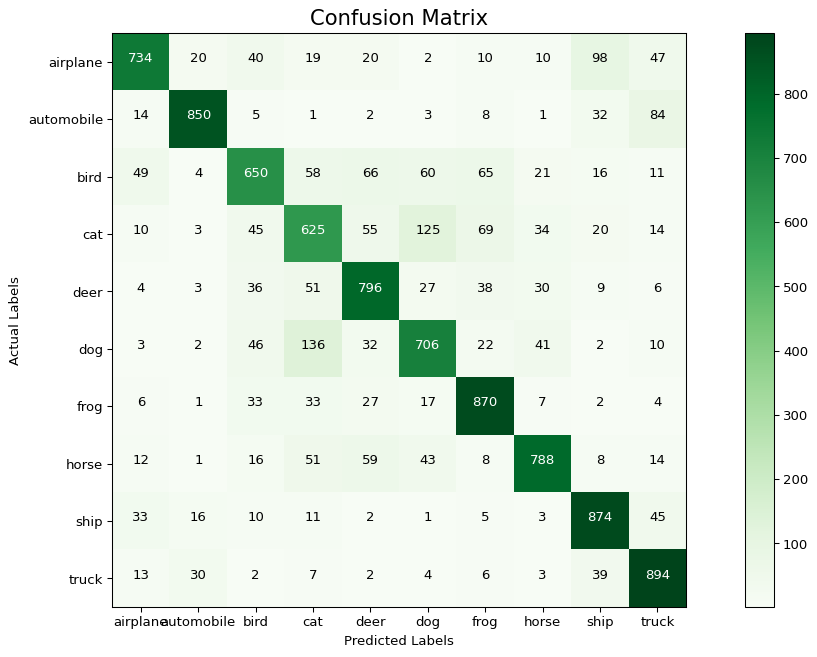

In [ ]:
plt.figure(figsize=(16,8), dpi=95)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16) # Title for the plot
plt.ylabel('Actual Labels', fontsize=10) # y lable
plt.xlabel('Predicted Labels', fontsize=10) #

tick_marks = np.arange(NR_CLASSES)  # Formatting Tick marks for our actual classes
plt.yticks(tick_marks, LABEL_NAMES) # Assigning the classes to the label name for Y-axis
plt.xticks(tick_marks, LABEL_NAMES) #Assigning the classes to the label name for X-axis

plt.colorbar() # This shows a color bar to the right

# Using the pythin itertools to loop through 2 values i j (rows & columns) ...
# ...to print the actual values on the conf matrix
# plt.text(j, i, conf_matrix[i, j]) {conf_matrix[i, j]} ->pulls out the actual values from the conf matrix

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
            color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')
    

plt.show()

# MODEL TWO /Early stopping

In [ ]:
model_2 = Sequential()

# CONVOLUTIONAL LAYER
model_2.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',))
model_2.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model_2.add(MaxPool2D(pool_size=(2, 2)))

# *************CONVOLUTIONAL LAYER
model_2.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',))
model_2.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model_2.add(MaxPool2D(pool_size=(2, 2)))

##CONVOLUTIONAL LAYER
model_2.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model_2.add(MaxPool2D(pool_size=(2, 2)))


# FLATTEN IMAGES, BEFORE FINAL LAYER
model_2.add(Flatten())
# 256 NEURONS IN DENSE HIDDEN LAYER 
model_2.add(Dense(256, activation='relu'))
# 128 NEURONS IN DENSE HIDDEN LAYER 
model_2.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model_2.add(Dense(10, activation='softmax'))

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)        

### Adding Early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
history2 = model_2.fit(x_train,y_cat_train,epochs=1000,batch_size=150,validation_data=(x_val,y_val_cat),callbacks=[early_stop])

Epoch 1/1000
267/267 [==============================] - 4s 12ms/step - loss: 2.0448 - accuracy: 0.2273 - val_loss: 1.5136 - val_accuracy: 0.4473
Epoch 2/1000
267/267 [==============================] - 3s 11ms/step - loss: 1.4729 - accuracy: 0.4638 - val_loss: 1.2932 - val_accuracy: 0.5314
Epoch 3/1000
267/267 [==============================] - 3s 11ms/step - loss: 1.2659 - accuracy: 0.5411 - val_loss: 1.2654 - val_accuracy: 0.5455
Epoch 4/1000
267/267 [==============================] - 3s 11ms/step - loss: 1.1452 - accuracy: 0.5943 - val_loss: 1.1148 - val_accuracy: 0.6072
Epoch 5/1000
267/267 [==============================] - 3s 11ms/step - loss: 1.0411 - accuracy: 0.6300 - val_loss: 1.0481 - val_accuracy: 0.6319
Epoch 6/1000
267/267 [==============================] - 3s 11ms/step - loss: 0.9652 - accuracy: 0.6586 - val_loss: 0.9961 - val_accuracy: 0.6514
Epoch 7/1000
267/267 [==============================] - 3s 11ms/step - loss: 0.9012 - accuracy: 0.6840 - val_loss: 0.9670 - val_ac

In [ ]:
history2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
metrics_2 = pd.DataFrame(history2.history)

In [ ]:
metrics_2

,loss,accuracy,val_loss,val_accuracy
0,1.841393,0.308675,1.513559,0.4473
1,1.416850,0.482200,1.293185,0.5314
2,1.241945,0.552450,1.265407,0.5455
3,1.122795,0.602000,1.114792,0.6072
4,1.032753,0.635250,1.048109,0.6319
5,0.969756,0.657225,0.996071,0.6514
6,0.899243,0.683650,0.967042,0.6627
7,0.843886,0.704225,0.910760,0.6807
8,0.781957,0.727575,0.985216,0.6670
9,0.733162,0.742325,0.912657,0.6863


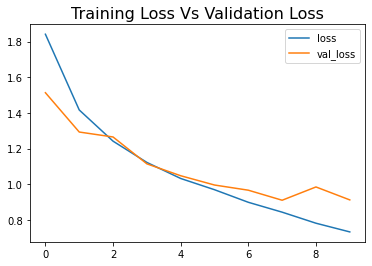

In [ ]:
metrics_2[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

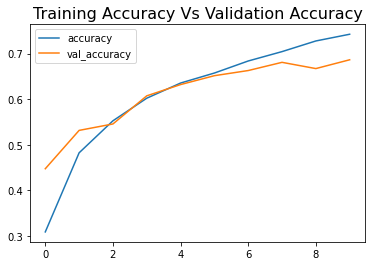

In [ ]:
metrics_2[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

# Evaluation on Test Data

In [ ]:
model_2.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9241 - accuracy: 0.6861


[0.9241401553153992, 0.6861000061035156]

# Model three adding Early stopping & Dropout

In [ ]:

model_3 = Sequential()

# CONVOLUTIONAL LAYER
model_3.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model_3.add(MaxPool2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))

# CONVOLUTIONAL LAYER
model_3.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model_3.add(MaxPool2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))



# FLATTEN IMAGES FROM 32 x 32 x 3 =3072 BEFORE FINAL LAYER
model_3.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER
model_3.add(Dense(128, activation='relu'))
model_3.add(Dropout(0.2))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model_3.add(Dense(10, activation='softmax'))

model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)             

### Adding Early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
history3 = model_3.fit(x_train,y_cat_train,epochs=1000,batch_size=150,validation_data=(x_val,y_val_cat),callbacks=[early_stop])

Epoch 1/1000
267/267 [==============================] - 3s 8ms/step - loss: 1.9124 - accuracy: 0.2945 - val_loss: 1.4349 - val_accuracy: 0.4866
Epoch 2/1000
267/267 [==============================] - 2s 7ms/step - loss: 1.4402 - accuracy: 0.4844 - val_loss: 1.3036 - val_accuracy: 0.5398
Epoch 3/1000
267/267 [==============================] - 2s 7ms/step - loss: 1.2703 - accuracy: 0.5499 - val_loss: 1.1390 - val_accuracy: 0.6083
Epoch 4/1000
267/267 [==============================] - 2s 7ms/step - loss: 1.1664 - accuracy: 0.5872 - val_loss: 1.0579 - val_accuracy: 0.6277
Epoch 5/1000
267/267 [==============================] - 2s 7ms/step - loss: 1.1084 - accuracy: 0.6082 - val_loss: 1.0206 - val_accuracy: 0.6442
Epoch 6/1000
267/267 [==============================] - 2s 7ms/step - loss: 1.0491 - accuracy: 0.6318 - val_loss: 0.9712 - val_accuracy: 0.6637
Epoch 7/1000
267/267 [==============================] - 2s 7ms/step - loss: 1.0002 - accuracy: 0.6510 - val_loss: 0.9552 - val_accuracy:

In [ ]:
history3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
metrics_3 = pd.DataFrame(history3.history)

In [ ]:
metrics_3

,loss,accuracy,val_loss,val_accuracy
0,1.708698,0.374750,1.434867,0.4866
1,1.398616,0.502675,1.303624,0.5398
2,1.252410,0.553775,1.138972,0.6083
3,1.158067,0.591125,1.057857,0.6277
4,1.097765,0.613200,1.020573,0.6442
5,1.036914,0.634875,0.971174,0.6637
6,0.997654,0.650500,0.955231,0.6761
7,0.948606,0.665150,0.923222,0.6826
8,0.913740,0.679025,0.890400,0.6904
9,0.875665,0.691200,0.873596,0.6981


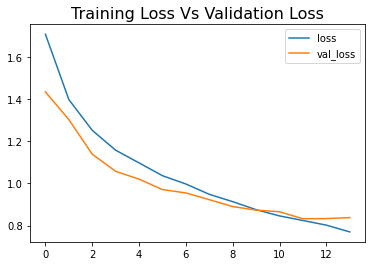

In [ ]:
metrics_3[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

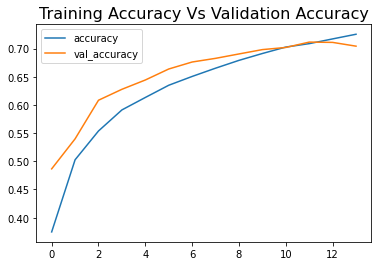

In [ ]:
metrics_3[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

# Evaluation on Test Data

In [ ]:
model_3.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8619 - accuracy: 0.7019


[0.8618693351745605, 0.7019000053405762]

# Classification Report and Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model_3.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1000
           1       0.80      0.84      0.82      1000
           2       0.59      0.58      0.58      1000
           3       0.61      0.40      0.48      1000
           4       0.70      0.56      0.62      1000
           5       0.62      0.63      0.62      1000
           6       0.59      0.90      0.71      1000
           7       0.76      0.78      0.77      1000
           8       0.82      0.81      0.81      1000
           9       0.83      0.75      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [ ]:
confusion_matrix(y_test,predictions)

array([[788,  26,  47,   6,  12,   6,  19,  12,  62,  22],
       [ 14, 836,  10,   8,   1,   2,  31,   3,  28,  67],
       [ 71,   6, 579,  25,  70,  74, 121,  40,   8,   6],
       [ 24,  11,  94, 400,  56, 190, 156,  39,  15,  15],
       [ 25,   3,  75,  37, 562,  40, 168,  71,  15,   4],
       [ 17,   5,  72, 113,  34, 628,  61,  57,   8,   5],
       [  5,   1,  35,  21,  14,  11, 897,   5,   6,   5],
       [ 16,   4,  49,  21,  45,  51,  24, 775,   5,  10],
       [ 74,  43,  15,  11,   7,   3,  16,   5, 807,  19],
       [ 38, 109,  11,  11,   4,  15,  21,  15,  29, 747]])

Predicting on single image

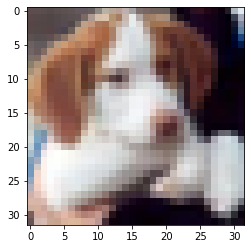

In [ ]:
plt.imshow(x_test[16])

In [ ]:
my_image = x_test[16]

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)
model_3.predict_classes(my_image.reshape(1,32,32,3))

In [ ]:
LABEL_NAMES[y_test[16][0]]

'dog'

# Confusion Matrix

In [ ]:
predictions = model_3.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
conf_matrix.shape

(10, 10)

In [ ]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [ ]:
# Showing the value with th
conf_matrix.max()

897

In [ ]:
conf_matrix.min()

1

In [ ]:
NR_CLASSES = 10

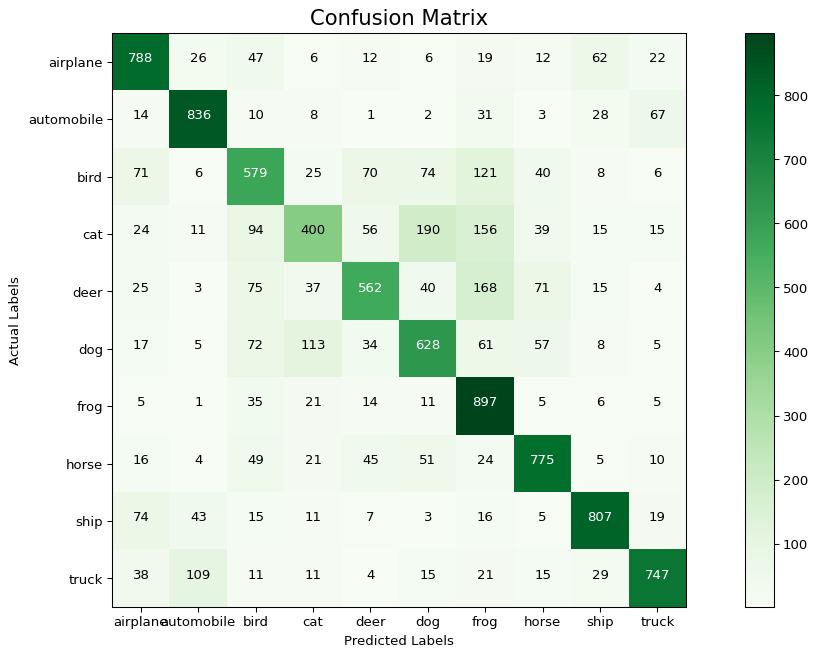

In [ ]:
plt.figure(figsize=(16,8), dpi=95)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16) # Title for the plot
plt.ylabel('Actual Labels', fontsize=10) # y lable
plt.xlabel('Predicted Labels', fontsize=10) #

tick_marks = np.arange(NR_CLASSES)  # Formatting Tick marks for our actual classes
plt.yticks(tick_marks, LABEL_NAMES) # Assigning the classes to the label name for Y-axis
plt.xticks(tick_marks, LABEL_NAMES) #Assigning the classes to the label name for X-axis

plt.colorbar() # This shows a color bar to the right

# Using the pythin itertools to loop through 2 values i j (rows & columns) ...
# ...to print the actual values on the conf matrix
# plt.text(j, i, conf_matrix[i, j]) {conf_matrix[i, j]} ->pulls out the actual values from the conf matrix

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
            color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')
    

plt.show()